In [242]:
import pandas as pd

In [243]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [244]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [245]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [246]:
y = df_encoded['price']
x = df_encoded.drop('price',axis = 1)
# y = xm + b


In [247]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain, ytest = train_test_split(x,y, test_size=0.2 )
# xtrain , xtest , ytrain, ytest = train_test_split(x,y, test_size=0.2 , random_state=42 )

In [248]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [249]:

print("Coefficients (Slopes):")
for col, coef in zip(x.columns, model.coef_):
    print(f"{col}: {coef}")

print("\nIntercept (Bias):")
print(model.intercept_)




Coefficients (Slopes):
area: 268.3975791115746
bedrooms: 123827.95631499239
bathrooms: 987428.6477005695
stories: 441259.18109609536
parking: 311489.054283791
mainroad_yes: 441405.6931845208
guestroom_yes: 326003.9947674724
basement_yes: 307573.1544355704
hotwaterheating_yes: 991712.2973588764
airconditioning_yes: 872234.3564135251
prefarea_yes: 598669.5177897445
furnishingstatus_semi-furnished: 6391.759202638831
furnishingstatus_unfurnished: -407155.845124993

Intercept (Bias):
-116498.1129813604


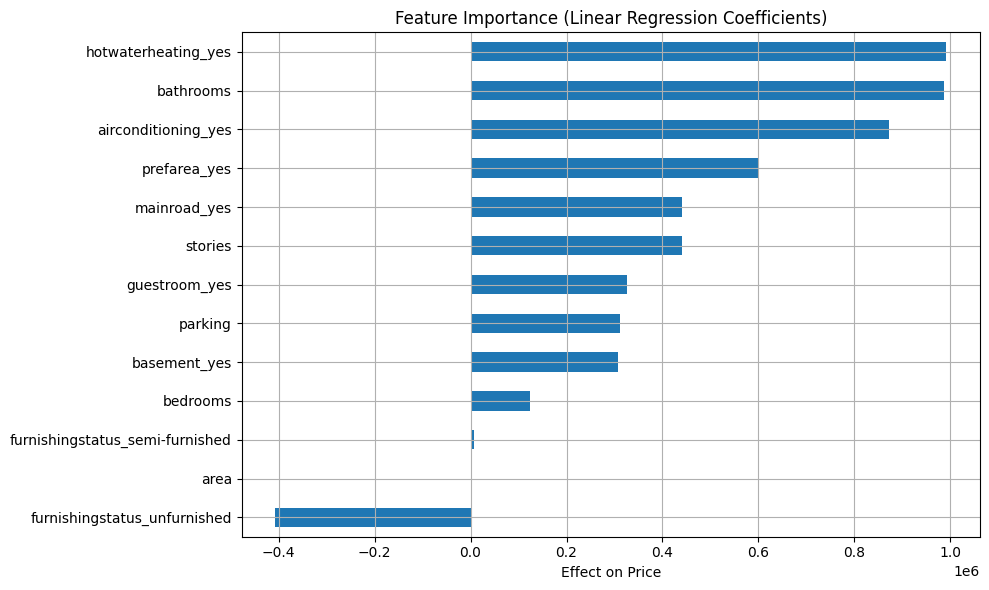

In [250]:
import matplotlib.pyplot as plt

coefs = pd.Series(model.coef_, index=x.columns)

coefs = coefs.sort_values()

# Plot
plt.figure(figsize=(10,6))
coefs.plot(kind='barh')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Effect on Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [251]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(xtest)

mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 948510610022.7386
R² Score: 0.5622170740318468


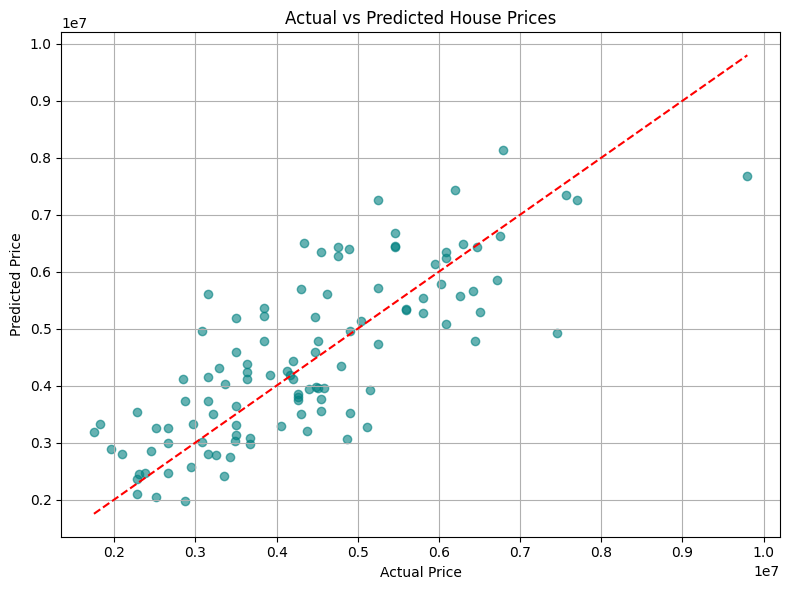

In [252]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(ytest, y_pred, color='teal', alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


In [253]:
import joblib
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']

In [254]:
model = joblib.load('house_price_model.pkl')
